<a href="https://colab.research.google.com/github/ulises1229/IntroPythonCENAM/blob/master/code/d%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Día 3 - Curso-Taller: Visualización de datos y modelado
##### Autores: Ulises Olivares, Walter Hauri
##### uolivares@unam.mx
##### 14 de diciembre de 2022


### Visualización de datos

In [1]:
# Cargamos la biblioteca de Seaborn para hacer los gráficos
import seaborn as sns
import matplotlib.pyplot as plt # Como ayuda para algunas visualizaciones 

# Así como pandas para la lectura
import pandas as pd

In [5]:
# Agregamos un poco de configuración para las gráficas (puedes explorar un poco más aquí: https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.set_style("dark")
#sns.set_context("poster")

Hacemos la lectura de los datos a graficar

In [3]:
temp = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/temp.csv")
temp.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


##### Gráfico de línea

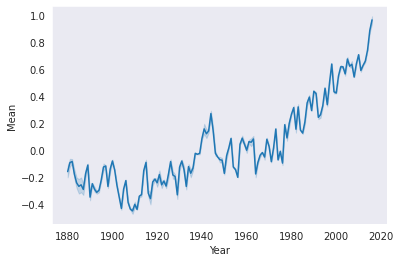

In [4]:
sns.lineplot(data=temp, x="Year", y="Mean");

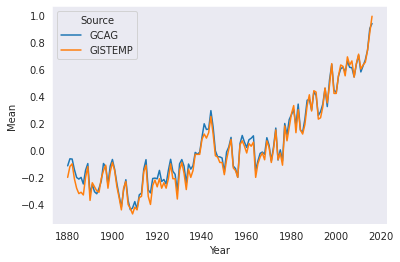

In [6]:
sns.lineplot(data=temp, x="Year", y="Mean", hue="Source"); # Lo separamos por la fuente

Hacemos la lactura de los datos a graficar

In [11]:
flights = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


Gráfico de dispersión

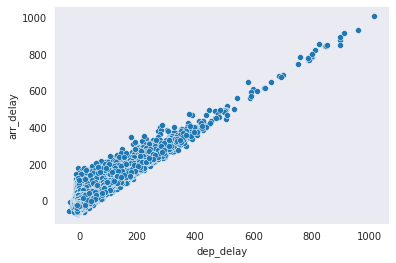

In [23]:
sns.scatterplot(data=flights, x="dep_delay", y="arr_delay");

In [17]:
flights["delay"] = flights["arr_delay"] - flights["dep_delay"] # Evaluamos el retraso neto del vuelo

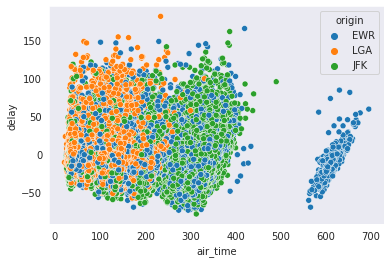

In [26]:
sns.scatterplot(data=flights, x="air_time", y="delay", hue="origin");

##### Histograma de frecuencias

Hacemos la lectura de los datos a graficar

In [28]:
salaries = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/salaries.csv")
salaries.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


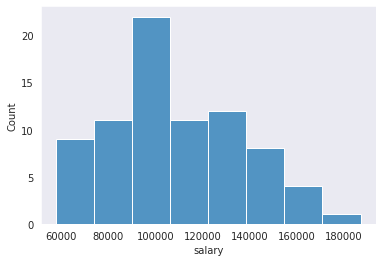

In [38]:
sns.histplot(data=salaries, x="salary");

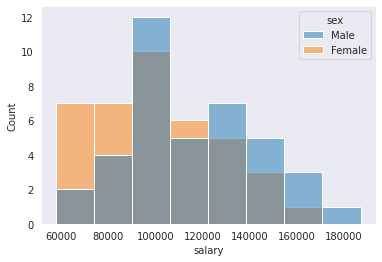

In [36]:
sns.histplot(data=salaries, x="salary", hue="sex");

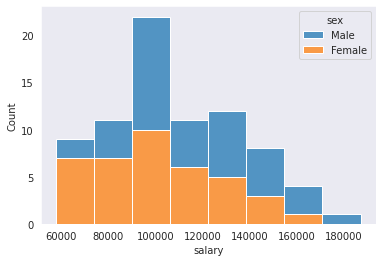

In [37]:
sns.histplot(data=salaries, x="salary", hue="sex", multiple="stack");

##### Gráfico de barras

In [79]:
# Sacamos la distancia promedio de los vuelos para cada destino
mean_distance_per_carrier = flights[["distance", "carrier"]].groupby(by=["carrier"]).mean()
mean_distance_per_carrier

,distance
carrier,
AA,1340.235999
AS,2402.000000
DL,1236.901206
UA,1529.114873
US,553.456272


In [80]:
# Convertimos el índice (dest) a una columna para poder graficar
mean_distance_per_carrier.reset_index(inplace=True)

# Los ordenamos de mayor a menor
mean_distance_per_carrier.sort_values(by="distance", inplace=True, ascending=False)

mean_distance_per_carrier

,carrier,distance
1,AS,2402.000000
3,UA,1529.114873
0,AA,1340.235999
2,DL,1236.901206
4,US,553.456272


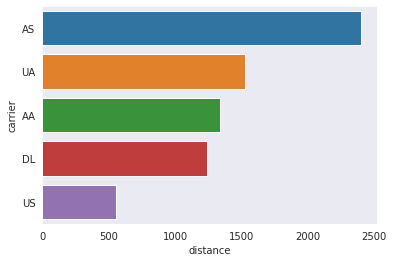

In [81]:
sns.barplot(data=mean_distance_per_carrier, x="distance", y="carrier");

##### Gráfico de caja y bigote

Hacemos la lectura de los datos a graficar

In [84]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/diamonds.csv", index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


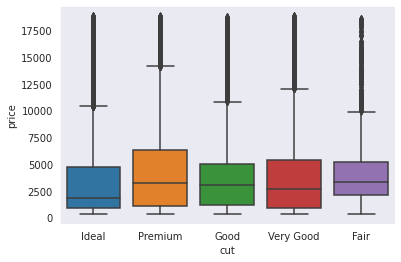

In [88]:
sns.boxplot(data=diamonds, x="cut", y="price");

In [89]:
# Calculamos un aproximado del volumen del diamante según sus dimensiones
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

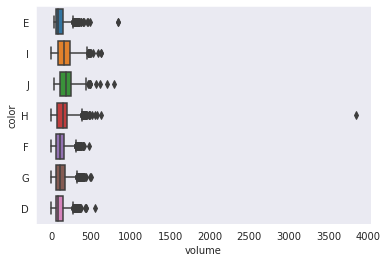

In [97]:
sns.boxplot(data=diamonds, x="volume", y="color", orient="h");

In [100]:
# Eliminamos los valores extremos para visualizar mejor la gráfica
diamonds_clean = diamonds.loc[diamonds["volume"] < 1000]

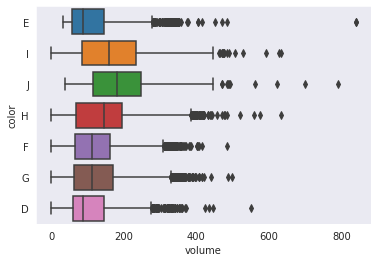

In [101]:
sns.boxplot(data=diamonds_clean, x="volume", y="color", orient="h");